In [71]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import SVR
%matplotlib inline

In [5]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving prices-split-adjusted.csv to prices-split-adjusted (2).csv


In [42]:
import pandas as pd 
import io 
  
stocks = pd.read_csv(io.BytesIO(uploaded['prices-split-adjusted.csv'])) 
print(stocks)

              date symbol        open  ...         low        high     volume
0       2016-01-05   WLTW  123.430000  ...  122.309998  126.250000  2163600.0
1       2016-01-06   WLTW  125.239998  ...  119.940002  125.540001  2386400.0
2       2016-01-07   WLTW  116.379997  ...  114.930000  119.739998  2489500.0
3       2016-01-08   WLTW  115.480003  ...  113.500000  117.440002  2006300.0
4       2016-01-11   WLTW  117.010002  ...  114.089996  117.330002  1408600.0
...            ...    ...         ...  ...         ...         ...        ...
851259  2016-12-30    ZBH  103.309998  ...  102.849998  103.930000   973800.0
851260  2016-12-30   ZION   43.070000  ...   42.689999   43.310001  1938100.0
851261  2016-12-30    ZTS   53.639999  ...   53.270000   53.740002  1701200.0
851262  2016-12-30    AIV   44.730000  ...   44.410000   45.590000  1380900.0
851263  2016-12-30    FTV   54.200001  ...   53.389999   54.480000   705100.0

[851264 rows x 7 columns]


In [7]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [8]:
stocks.head(10)

date symbol        open       close         low        high     volume
0  2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000  2163600.0
1  2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001  2386400.0
2  2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998  2489500.0
3  2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002  2006300.0
4  2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002  1408600.0
5  2016-01-12   WLTW  115.510002  115.550003  114.500000  116.059998  1098000.0
6  2016-01-13   WLTW  116.459999  112.849998  112.589996  117.070000   949600.0
7  2016-01-14   WLTW  113.510002  114.379997  110.050003  115.029999   785300.0
8  2016-01-15   WLTW  113.330002  112.529999  111.919998  114.879997  1093700.0
9  2016-01-19   WLTW  113.660004  110.379997  109.870003  115.870003  1523500.0

In [9]:
stocks.describe()

open          close            low           high        volume
count  851264.000000  851264.000000  851264.000000  851264.000000  8.512640e+05
mean       64.993618      65.011913      64.336541      65.639748  5.415113e+06
std        75.203893      75.201216      74.459518      75.906861  1.249468e+07
min         1.660000       1.590000       1.500000       1.810000  0.000000e+00
25%        31.270000      31.292776      30.940001      31.620001  1.221500e+06
50%        48.459999      48.480000      47.970001      48.959999  2.476250e+06
75%        75.120003      75.139999      74.400002      75.849998  5.222500e+06
max      1584.439941    1578.130005    1549.939941    1600.930054  8.596434e+08

In [14]:
pip install -U pandas-profiling

     |████████████████████████████████| 266kB 4.7MB/s 
     |████████████████████████████████| 3.1MB 9.8MB/s 
     |████████████████████████████████| 604kB 48.4MB/s 
     |████████████████████████████████| 71kB 7.2MB/s 
     |████████████████████████████████| 71kB 7.8MB/s 
     |████████████████████████████████| 71kB 7.6MB/s 
     |████████████████████████████████| 296kB 46.0MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=973b13fac83c4bde9bc57f9de6293acfbd04878a30c2f9e70e34c5ea07164f70
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=79dafbdc55fa3f63e5617e954cdf4a6750ecaff6d70180216ae2e25866652cdf
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Uni

In [10]:
# Minimal avoids expensive calculations that won't have much insight for us and are slow.
profile = ProfileReport(stocks, minimal=True)
profile.to_widgets()

/usr/local/lib/python3.6/dist-packages/pandas_profiling/profile_report.py:397: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


In [11]:
stocks.profile_report()

 What do you notice about the data?
  it so clear , organized  and understandable
  Are there ways to slice the data that would give more information?
  i think this the best way 






Exercise: Are there other visualizations that would give you greater understanding?

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [13]:
 def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('open', color='gray')
    ax.set_ylabel('close ', color='gray')
    ax.set_title(title, color='gray')

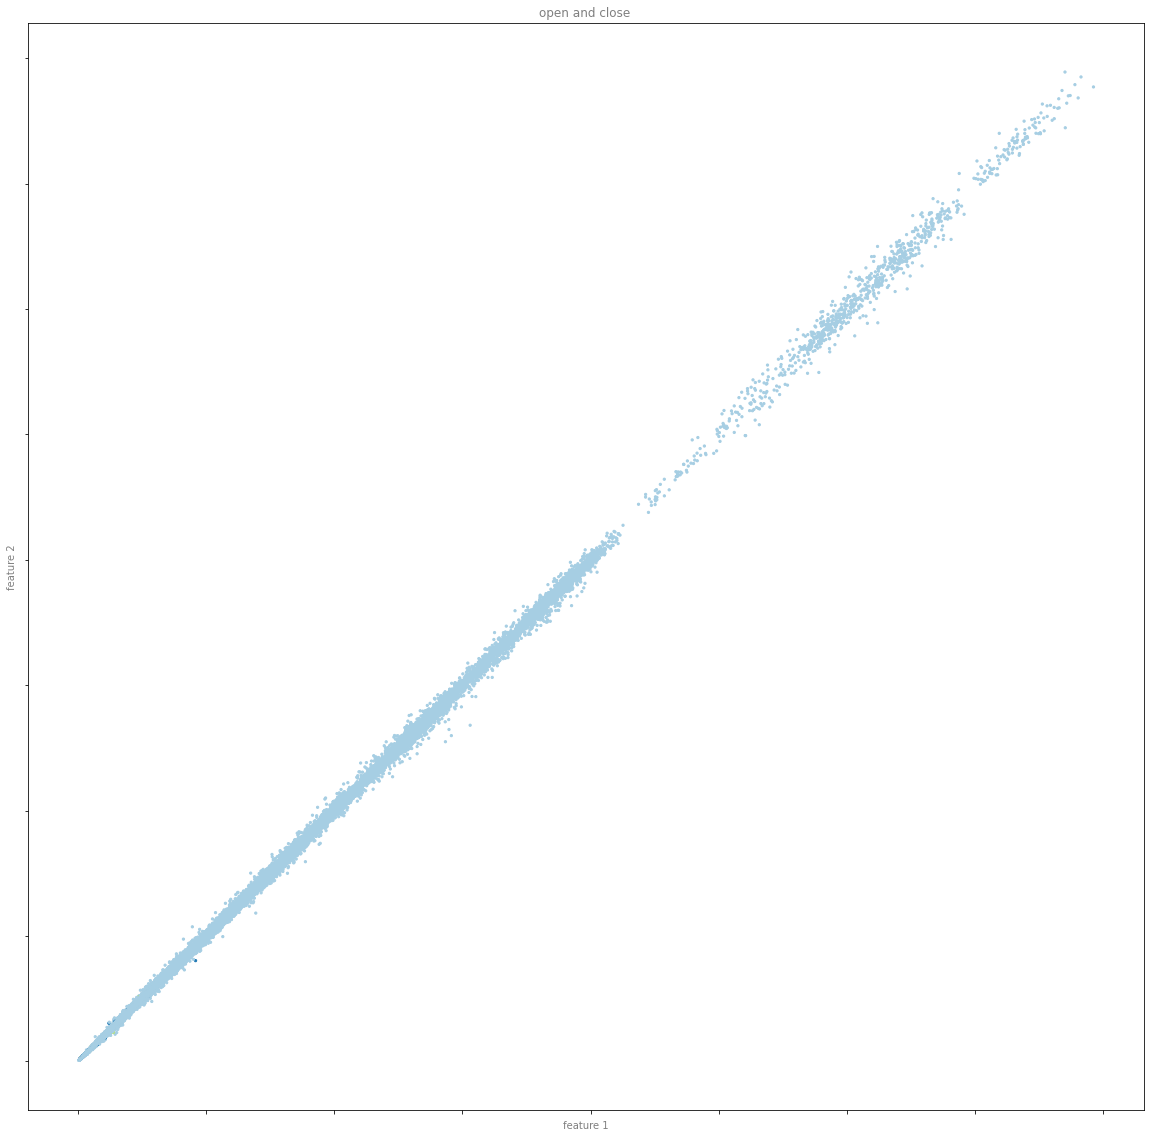

In [24]:
fig, ax = plt.subplots(figsize=(20, 20))
point_style = dict(cmap='Paired', s=5)
ax.scatter(stocks['open'], stocks['close'], c=stocks['volume'], **point_style)

# format plot
format_plot(ax, 'open and close ')

The stock is incresing 

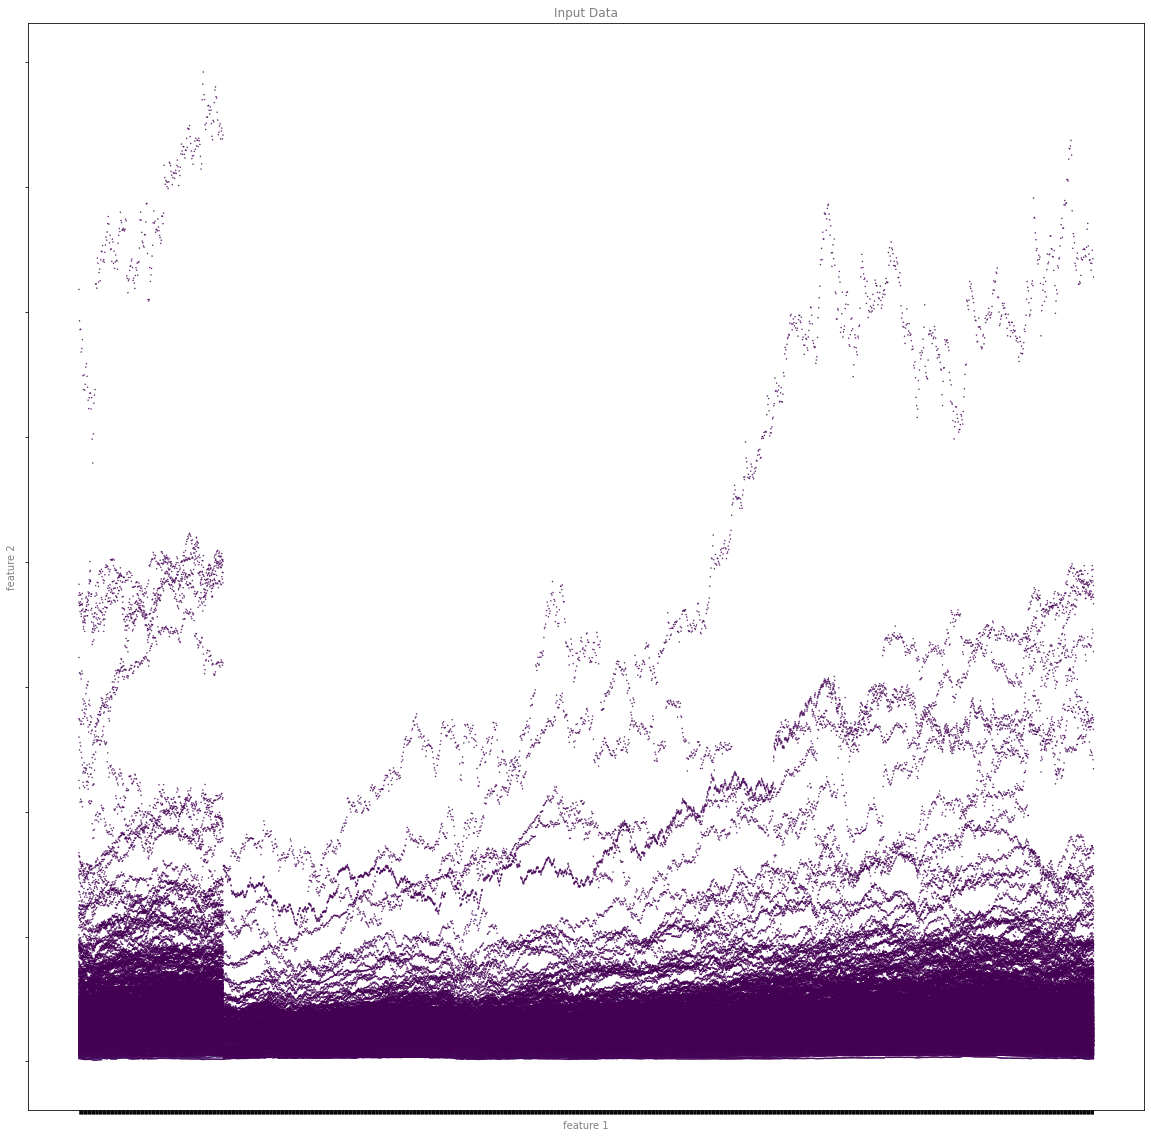

In [30]:
# plot data points
fig, ax = plt.subplots(figsize=(20, 20))
points = ax.scatter(stocks['date'], stocks['open'], c=stocks['volume'],
                    cmap='viridis' , s=0.2 )

# format plot
format_plot(ax, 'Input Data')
#ax.axis([-4, 4, -3, 3])

#fig.savefig('figures/05.01-regression-1.png')

In [60]:
def feature_target_generation(df):
    """
    df: a pandas dataframe containing numerical columns
    num_days_ahead: an integer that can be used to shift the prediction value from the future into a prior row.
    """

    # The following line ensures the data is in date order    
    features = pd.DataFrame(index=df.index).sort_index() 
    features['f01'] = np.log(df.close / df.open) # intra-day log return
    features['f02'] = np.log(df.open / df.close.shift(1)) # overnight log return

    features['f03'] = df.volume # try both regular and log volume
    features['f04'] = np.log(df.volume) 
    features['f05'] = df.volume.diff() # 1-day absolute change in volume
    features['f06'] = df.volume.pct_change() # 1-day relative change in volume
    # The following are rolling averages of different periods
    features['f07'] = df.volume.rolling(5, min_periods=1).mean().apply(np.log)
    features['f08'] = df.volume.rolling(10, min_periods=1).mean().apply(np.log)
    features['f09'] = df.volume.rolling(30, min_periods=1).mean().apply(np.log)

    # More of our original data: low, high and close
    features['f10'] = df.low 
    features['f11'] = df.high
    features['f12'] = df.close
    # The Intraday trading spread measures how far apart the high and low are
    features['f13'] = df.high - df.low 
    # These are log returns over different time periods 
    features['f14'] = np.log(df.close / df.close.shift(1)) # 1 day log return
    features['f15'] = np.log(df.close / df.close.shift(5)) # 5 day log return
    features['f16'] = np.log(df.close / df.close.shift(10)) # 10 day log return
    return features

In [62]:
# Let's generate a list of tickers so we can easily select them
ticker_list = stocks.symbol.unique()

# these are hyperparameters you can play with or tune
prediction_horizon = -5 # this is a negative number by convention
ticker = 'MSFT' # choose any ticker
n_splits = 5 

# Make an individual model for each ticker/symbol
features = feature_target_generation(stocks[stocks.symbol==ticker])

In [63]:
# We are trying to predict the price prediction_horizon days in the future.  So we take the future value and move it prediction_horizon into the past to line up our data in the Scikit-learn format.  
y = features.f12.shift(prediction_horizon)
# The latest (prediction_horizon) rows will have nans because we have no future data, so let's drop them.
shifted = ~np.isnan(y)
X = features[y.notna()] # Remove the rows that do not have valid target values
y = y[shifted] # Remove the rows that do not have valid target values

# Split the history into different backtesting regimes
tscv = TimeSeriesSplit(n_splits=n_splits)
print(tscv)

TimeSeriesSplit(max_train_size=None, n_splits=5)


In [65]:
# Review the features
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762 entries, 544 to 851076
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f01     1762 non-null   float64
 1   f02     1761 non-null   float64
 2   f03     1762 non-null   float64
 3   f04     1762 non-null   float64
 4   f05     1761 non-null   float64
 5   f06     1761 non-null   float64
 6   f07     1762 non-null   float64
 7   f08     1762 non-null   float64
 8   f09     1762 non-null   float64
 9   f10     1762 non-null   float64
 10  f11     1762 non-null   float64
 11  f12     1762 non-null   float64
 12  f13     1762 non-null   float64
 13  f14     1761 non-null   float64
 14  f15     1757 non-null   float64
 15  f16     1752 non-null   float64
dtypes: float64(16)
memory usage: 234.0 KB


In [67]:
def model_ts_report(model, tscv, X, y, impute=False):
    """
    Fit the model and then run time series backtests.
    """
    # Loop through the backtests
    for train_ind, test_ind in tscv.split(X): 
        # Report on the time periods
        print(f'Train is from {X.iloc[train_ind].index.min()} to {X.iloc[train_ind].index.max()}. ')
        print(f'Test is from {X.iloc[test_ind].index.min()} to {X.iloc[test_ind].index.max()}. ')
        # Generate training and testing features and target for each fold.
        X_train, X_test = X.iloc[train_ind], X.iloc[test_ind]
        y_train, y_test = y.iloc[train_ind], y.iloc[test_ind]

        if impute==True:
            # Since linear regression cannot deal with NaN, we need to impute.  There may be the better choices.
            X_train.fillna(0, inplace=True)
            X_test.fillna(0, inplace=True)
        
        # Fit the model
        model.fit(X_train, y_train)

        # Predict and measure on the training data
        y_pred_train = model.predict(X_train) 
        print("Training results:")
        print("RMSE:", mean_squared_error(y_train, y_pred_train, squared=False))

        # Predict and measure on the testing data
        y_pred_test = model.predict(X_test)
        print("Test results:")
        print("RMSE:", mean_squared_error(y_test, y_pred_test, squared=False))
        print("")


In [68]:
from sklearn.linear_model import LinearRegression
# Fit and report on a linear model
lm = LinearRegression()
model_ts_report(lm, tscv, X, y, impute=True)

Train is from 544 to 139365. 
Test is from 139835 to 276605. 
Training results:
RMSE: 0.7646691835724355
Test results:
RMSE: 0.8845465388255741

Train is from 544 to 276605. 
Test is from 277075 to 415644. 
Training results:
RMSE: 0.8046921042806601
Test results:
RMSE: 0.9584478611049053

Train is from 544 to 415644. 
Test is from 416132 to 558601. 
Training results:
RMSE: 0.8388520878620441
Test results:
RMSE: 1.2199726514811964

Train is from 544 to 558601. 
Test is from 559091 to 702761. 
Training results:
RMSE: 0.9135655974444158
Test results:
RMSE: 1.8578363800105724

Train is from 544 to 702761. 
Test is from 703259 to 848576. 
Training results:
RMSE: 1.1573573014113843
Test results:
RMSE: 1.562345057239908



/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/pandas/

In [69]:
# Initiate a Random Forest
rf = RandomForestRegressor()
model_ts_report(rf, tscv, X, y, impute=True) # Report on the random forest

Train is from 544 to 139365. 
Test is from 139835 to 276605. 


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Training results:
RMSE: 0.22988133803383912
Test results:
RMSE: 1.1658336431961025

Train is from 544 to 276605. 
Test is from 277075 to 415644. 


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Training results:
RMSE: 0.24117056055531605
Test results:
RMSE: 1.359902596472878

Train is from 544 to 415644. 
Test is from 416132 to 558601. 


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Training results:
RMSE: 0.2568348413907581
Test results:
RMSE: 5.332933921746513

Train is from 544 to 558601. 
Test is from 559091 to 702761. 


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Training results:
RMSE: 0.27980216810823033
Test results:
RMSE: 2.928901315530225

Train is from 544 to 702761. 
Test is from 703259 to 848576. 


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Training results:
RMSE: 0.3819581256531739
Test results:
RMSE: 5.007410204609812



**Open Ended Exercise**

Now is your turn to go ahead and improve these models. Some areas that might help could be to:

Tune the existing models (Random forest has a number of parameters that may help)
Clean the existing data (Fill missing values better)
Try other models such as Support Vector Regressor, Extra Trees Regressor or ElasticNet
Try this for more stocks (Just becasue it did not work for one stock, it may still be useful for most stocks)
Get more features, through transformations or outside data

In [76]:

tune=SVR()
model_ts_report(tune, tscv, X, y, impute=True)

Train is from 544 to 139365. 
Test is from 139835 to 276605. 
Training results:
RMSE: 1.9899988398808799
Test results:
RMSE: 2.4850257389691337

Train is from 544 to 276605. 
Test is from 277075 to 415644. 
Training results:
RMSE: 2.3090961345316012
Test results:
RMSE: 3.7125802448268703

Train is from 544 to 415644. 
Test is from 416132 to 558601. 
Training results:
RMSE: 2.5378795965257854


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Test results:
RMSE: 9.550988024659993

Train is from 544 to 558601. 
Test is from 559091 to 702761. 
Training results:
RMSE: 4.152410565819207
Test results:
RMSE: 12.786892598010212

Train is from 544 to 702761. 
Test is from 703259 to 848576. 


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Training results:
RMSE: 5.883734323996803
Test results:
RMSE: 17.633890981940468



In [78]:
stocks.symbol.unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [90]:
smybol_p='IBM'
Feat=feature_target_generation(stocks[stocks['symbol']==smybol_p])
lr=LinearRegression()
lr
model_ts_report(lr,tscv, X, y , impute=True)

Train is from 544 to 139365. 
Test is from 139835 to 276605. 
Training results:
RMSE: 0.7646691835724355
Test results:
RMSE: 0.8845465388255741

Train is from 544 to 276605. 
Test is from 277075 to 415644. 
Training results:
RMSE: 0.8046921042806601
Test results:
RMSE: 0.9584478611049053

Train is from 544 to 415644. 
Test is from 416132 to 558601. 
Training results:
RMSE: 0.8388520878620441
Test results:
RMSE: 1.2199726514811964

Train is from 544 to 558601. 
Test is from 559091 to 702761. 
Training results:
RMSE: 0.9135655974444158
Test results:
RMSE: 1.8578363800105724

Train is from 544 to 702761. 
Test is from 703259 to 848576. 
Training results:
RMSE: 1.1573573014113843
Test results:
RMSE: 1.562345057239908



/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/pandas/